<a href="https://colab.research.google.com/github/VrushankAmare/Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "**NETFLIX MOVIES AND TV SHOWS CLUSTERING**"

## **In this notebook, we plan to execute the following outline:**
*   **Problem Description**
*   **Preparation**
   *  **Importing Packages and Loading Data**
*   **Exploratory Data Analysis (EDA)**
   *  Data Overview and Cleaning
   *  Checking null values
   *  Dropping null values
   *  Dropping few columns
   *  Checking the duplicates and their sum
   *  Multivariate Analysis
   *  Data Analysis and Visualization
   *  The Relationship Between the Categories
   *  Correlation Between the Variables
   
*   **Feature Selection**
* **Clustering data**

*  **Algorithm Selection**

*  **Hyperparameter Tuning**

*   **Model Evaluation**

*   **Conclusion**


# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Importing Neccessary Modules and Loading Dataset**

**Import libraries**

In [1]:
#Importing the libraries we need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

##Mounting the dataset from GitHub

In [19]:
# file path of dataset

data='https://drive.google.com/uc?export=download&id=1xJGllnE12mAggLuRo8b0oNSshUlG8GvF'


In [21]:
# dataframe

Netflix_df = pd.read_csv(data, encoding ='latin')


# **Exploring and Understanding the Dataset**

In [22]:
#to show the top 5 row
Netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [23]:
#to show bottom five rows of the dataset
Netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


The dataset contains approx 7787 titles, 12 descriptions. After a quick view of the data frames, it looks like a typical movie/TVshows data frame without ratings. We can also see that there are NaN values in some columns.

In [24]:
#checking the shape of the dataset
Netflix_df.shape

(7787, 12)

In [25]:
#checking column names
Netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [26]:
#information of the dataset
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [27]:
# describing the dataset
Netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### 3.5 Defining a function for Missing and Unique values all together.

In [28]:
#creating a function for datainfo
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*125)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    return summary

In [29]:
#checking DataInfoAll values
DataInfoAll(Netflix_df)

Dataset Shape: (7787, 12)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,show_id,object,0,7787,s1,s2
1,type,object,0,2,TV Show,Movie
2,title,object,0,7787,3%,7:19
3,director,object,2389,4049,NaN,Jorge Michel Grau
4,cast,object,718,6831,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...","DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano..."
5,country,object,507,681,Brazil,Mexico
6,date_added,object,10,1565,"August 14, 2020","December 23, 2016"
7,release_year,int64,0,73,2020,2016
8,rating,object,7,14,TV-MA,TV-MA
9,duration,object,0,216,4 Seasons,93 min


## **Handling Missing / Null / Duplicate Values**

# Checking Duplicate Values

In [31]:
#print duplicate values 
df_duplicate = Netflix_df[Netflix_df.duplicated()]
print("Let's print all the duplicated rows as a dataframe")
df_duplicate

Let's print all the duplicated rows as a dataframe


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


* There are no duplicate values present in this dataset.


##    <b>4. Data Cleaning & Data Visualization

# Checking NaN/Null values

In [32]:
#total null values in dataset
Netflix_df.isnull().sum().sum()

3631

* There are total **3631** Null values present in the dataset.

In [33]:
#checking for null values 
#"TRUE"- The variable is containing null value
#"False"- The variable not containing null value
print('\nColumns with missing value:') 
print(Netflix_df.isnull().any())


Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool


There are a few columns that contain null values, “director,” “cast,” “country,” “date_added,” “rating.”

In [34]:
#percentage of null values
NaN_Checker = pd.DataFrame({"No Of Total Values": Netflix_df.shape[0] , "No of NaN values": Netflix_df.isnull().sum(),
                    "%age of NaN values" : round((Netflix_df.isnull().sum()/ Netflix_df.shape[0])*100 , 2) })
NaN_Checker.sort_values("No of NaN values" , ascending = False)

,No Of Total Values,No of NaN values,%age of NaN values
director,7787,2389,30.68
cast,7787,718,9.22
country,7787,507,6.51
date_added,7787,10,0.13
rating,7787,7,0.09
show_id,7787,0,0.00
type,7787,0,0.00
title,7787,0,0.00
release_year,7787,0,0.00
duration,7787,0,0.00


* **director** *column has highest NaN values 30.7% data is missing*
* **cast** *column has 9% NaN values*
* **country , date_added , rating** this columns also containing missing values

# Data visualization for Null values present in the dataset

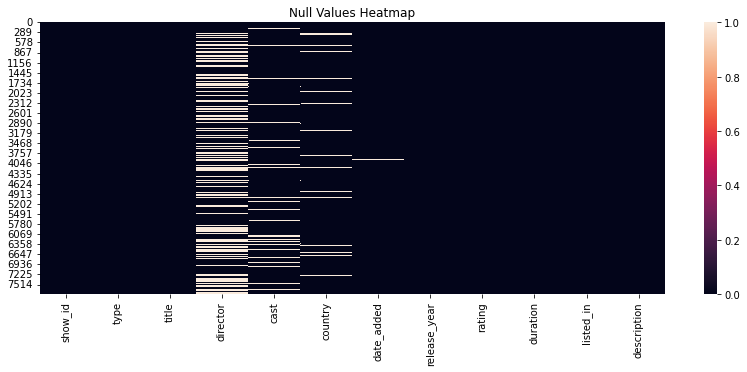

In [35]:
#Heatmap graph of null values
plt.figure(figsize=(14, 5))
sns.heatmap(Netflix_df.isnull(), cbar=True)
plt.title("Null Values Heatmap")
plt.show()


Above in the heatmap and table, we can see that there are quite few null values in the dataset. There are a total of 3631 null values across the entire dataset with 2389 missing points under 'director',718 under 'cast', 570 under 'country', 10 under 'date_added', and 7 under 'rating'. We will have to handle all null data points before we can dive into EDA and modeling.

# **Data visualization(using Barplot) of distribution of NaN values in this dataset.**

<BarContainer object of 12 artists>

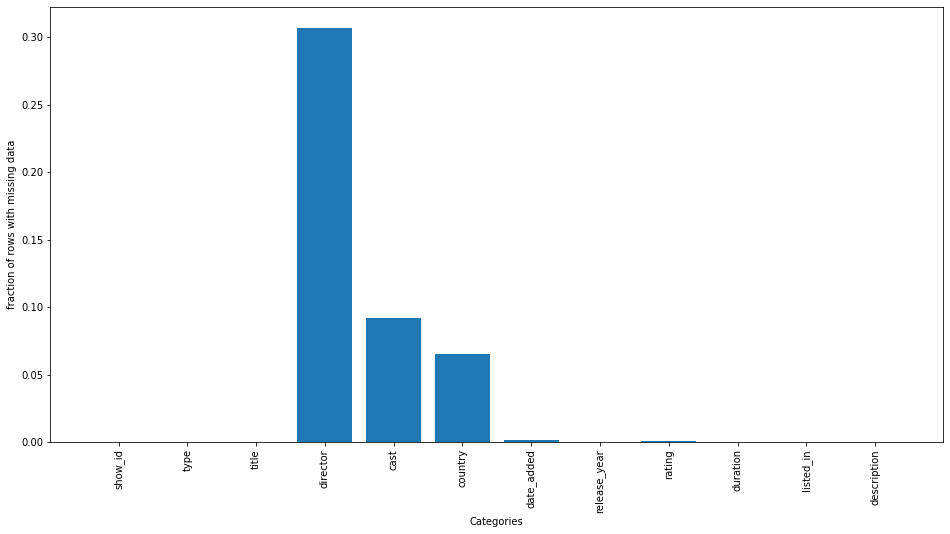

In [36]:
# null values distribution
null_counts = Netflix_df.isnull().sum()/len(Netflix_df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.xlabel('Categories')
plt.bar(np.arange(len(null_counts)),null_counts)

* So from above bar graph its clear that **director** and **cast** contains large number of null values,so we will drop it.

# **Data Cleaning**

In [37]:
#dropping irrelevant columns
Netflix_df.drop(['director','cast'],axis=1, inplace=True)

Data analysis on date_added category

##Looking NaN values on **date_added** column

In [38]:
#getting null values from date_added column
data_added_NaN = Netflix_df[Netflix_df['date_added'].isna()]
data_added_NaN.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...


In [39]:
#to get shape of column
data_added_NaN.shape

(10, 10)

In [40]:
#showing comparison of column date_added
print(f"Before dropping the NaN values from date_added the shape was {Netflix_df.shape}")
Netflix_df.dropna(subset = [ 'date_added' ], inplace = True)
print(f"After dropping the NaN values from date_added now the shape is {Netflix_df.shape}")

Before dropping the NaN values from date_added the shape was (7787, 10)
After dropping the NaN values from date_added now the shape is (7777, 10)


### 4.4 Looking for unique values

In [41]:
#show the unique values in the dataset
Netflix_df.nunique()

show_id         7777
type               2
title           7777
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        491
description     7759
dtype: int64

 **From above table we see that category "type" contains 2 unique values so we will do analysis of this column.**

In [42]:
#show unique value for type column
Netflix_df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)